In [313]:
import numpy as np
import cv2
from random import randint
from matplotlib import pyplot as plt
import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold
from keras.wrappers.scikit_learn import KerasClassifier
import time
import pandas as pd
from random import randint
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from enum import Enum
from tensorflow.keras.layers import (Activation, Conv2D, Dense, Dropout,
                                     Flatten, MaxPooling2D, LSTM, MaxPool2D)
from quickdraw import QuickDrawDataGroup, QuickDrawData
from skmultilearn.model_selection import iterative_train_test_split

In [314]:
class Classes(Enum):
    aviao = 1
    banana = 2
    abelha = 3
    copo_de_cafe = 4
    carangueijo = 5
    guitarra = 6,
    hamburguer = 7,
    coelho = 8,
    caminhao = 9,
    guarda_chuva = 10

NUMERO_DE_AMOSTRAS = 100
NUMERO_DE_CLASSES = len(Classes)
IMAGE_SIZE = 28

In [315]:
images_labels = [
  'airplane',
  'banana',  
  'bee',
  'coffee cup',
  'crab',
  'guitar',
  'hamburger',
  'rabbit',
  'truck',
  'umbrella']

images = list(map(lambda x: QuickDrawDataGroup(x, max_drawings=1000), images_labels))

loading airplane drawings
load complete
loading banana drawings
load complete
loading bee drawings
load complete
loading coffee cup drawings
load complete
loading crab drawings
load complete
loading guitar drawings
load complete
loading hamburger drawings
load complete
loading rabbit drawings
load complete
loading truck drawings
load complete
loading umbrella drawings
load complete


In [316]:
def process_quickdraw_image(quickdraw_binimage, imagePosition, x, y, ylabel):
    image = quickdraw_binimage.get_drawing(index=imagePosition).image.resize((IMAGE_SIZE,IMAGE_SIZE)).convert('L')
    imageArr = np.array(image).astype(np.float32)
    imageArr = imageArr/255
    x.append(imageArr)
    y_labels = np.zeros(NUMERO_DE_CLASSES)
    y_labels[ylabel] = 1
    y.append(y_labels)
    #y.append(ylabel)

# KERAS MODELS

def create_cnn_model(optimizer = 'adam'):
    modelo = Sequential()
    modelo.add(Conv2D(32, kernel_size=(3, 3),
                    activation='relu',
                    input_shape=(28,28,1)))

    modelo.add(Conv2D(64, (3, 3), activation='relu'))
    modelo.add(MaxPooling2D(pool_size=(2, 2)))
    modelo.add(Dropout(0.2))                 
    modelo.add(Flatten())
    modelo.add(Dense(64, activation='relu'))
    modelo.add(Dropout(0.2))
    modelo.add(Dense(64, activation='relu'))
    modelo.add(Dropout(0.2))
    modelo.add(Dense(64, activation='relu'))
    modelo.add(Dropout(0.2))
    modelo.add(Dense(NUMERO_DE_CLASSES, activation='softmax'))
    modelo.compile(optimizer = optimizer, loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

    return modelo

def create_cnn_model_2():
  model = Sequential()
  model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(28,28,1)))
  model.add(MaxPool2D())
  model.add(Dropout(rate=0.2))  
  model.add(Conv2D(32, 3, padding="same", activation="relu"))
  model.add(MaxPool2D())
  model.add(Dropout(rate=0.2))  
  model.add(Conv2D(64, 3, padding="same", activation="relu"))
  model.add(MaxPool2D())
  model.add(Dropout(rate=0.2))  
  model.add(Flatten())
  model.add(Dense(128,activation="relu"))
  model.add(Dense(10, activation="softmax"))
  model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  return model

def create_rnn_model(optimizer = 'adam'):
    modelo = Sequential()
    modelo.add(LSTM(64, input_shape=(28, 28),
              activation="relu", return_sequences=True))
    modelo.add(LSTM(32, activation="relu"))
    modelo.add(Dropout(0.5))
    modelo.add(Dense(32, activation="relu"))
    modelo.add(Dropout(0.5))
    modelo.add(Dense(32, activation='relu'))
    modelo.add(Dropout(0.5))
    modelo.add(Dense(NUMERO_DE_CLASSES, activation="softmax"))
    modelo.compile(optimizer=optimizer, loss="categorical_crossentropy",
                  metrics=["accuracy"])
    return modelo

In [317]:
# Carregando imagens
x = []
y = []

for i in range(0, len(Classes)):
    for amostra_posicao in range(0,NUMERO_DE_AMOSTRAS):
        process_quickdraw_image(images[i], amostra_posicao, x, y, i)


x = np.array(x)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)
#X_train, y_train, X_test, y_test = iterative_train_test_split(x, y, test_size=0.2)

Epoch 1/80
25/25 [==============================] - 1s 36ms/step - loss: 2.3072 - accuracy: 0.0913 - val_loss: 2.3062 - val_accuracy: 0.0750
Epoch 2/80
25/25 [==============================] - 1s 31ms/step - loss: 2.3031 - accuracy: 0.0950 - val_loss: 2.3123 - val_accuracy: 0.0750
Epoch 3/80
25/25 [==============================] - 1s 32ms/step - loss: 2.3026 - accuracy: 0.1013 - val_loss: 2.3090 - val_accuracy: 0.0550
Epoch 4/80
25/25 [==============================] - 1s 31ms/step - loss: 2.3021 - accuracy: 0.1112 - val_loss: 2.3118 - val_accuracy: 0.0550
Epoch 5/80
25/25 [==============================] - 1s 31ms/step - loss: 2.3008 - accuracy: 0.1112 - val_loss: 2.3136 - val_accuracy: 0.0550
Epoch 6/80
25/25 [==============================] - 1s 32ms/step - loss: 2.3014 - accuracy: 0.1112 - val_loss: 2.3139 - val_accuracy: 0.0550
Epoch 7/80
25/25 [==============================] - 1s 31ms/step - loss: 2.3012 - accuracy: 0.1112 - val_loss: 2.3136 - val_accuracy: 0.0550
Epoch 8/80
25

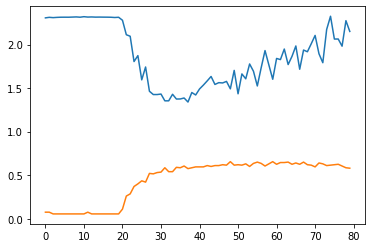

In [318]:
model = create_cnn_model()
best_history = model.fit(X_train, y_train, epochs=80, validation_data=(X_test, y_test))

plt.plot(best_history.history['val_loss'])
plt.plot(best_history.history['val_accuracy'])